In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def fpr(y_true,y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    fpr=fp/(fp+tn)
    return(fpr)

In [57]:
additional_metrics = ['accuracy']
loss_function = BinaryCrossentropy()
number_of_epochs = 500
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [5]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Data generation

In [8]:
m=75000
n=25000
r=0.5

In [51]:
x_pos = np.random.normal(loc=250, scale=100, size=(m//2))
x_neg = np.random.normal(loc=750, scale=100, size=(m//2))

x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 1).astype(int)
y_train = np.concatenate((np.ones(m//2), np.zeros(m//2))).reshape(-1, 1).astype(int)

In [52]:
x_train.shape

(75000, 1)

<AxesSubplot:ylabel='Count'>

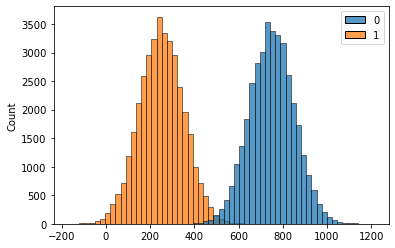

In [53]:
sns.histplot(x=x_train.flatten(), hue=y_train.flatten())

## Model training

In [54]:
batch_size = len(x_train)

In [58]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

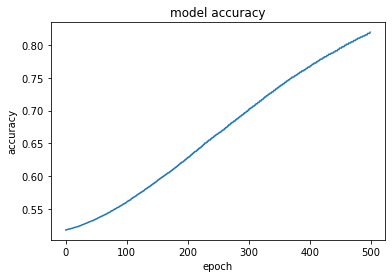

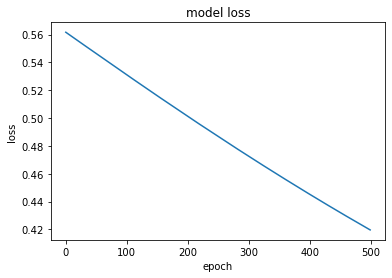

In [59]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [60]:
number_of_epochs = 150
layer_size = 50

In [61]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [62]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

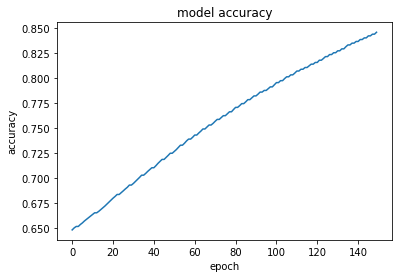

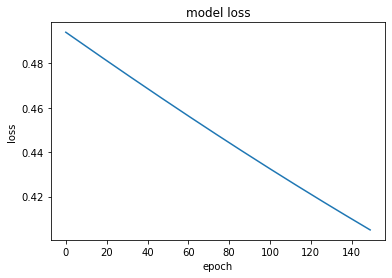

In [67]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=50

In [70]:
layer_size = 200
number_of_epochs = 100
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


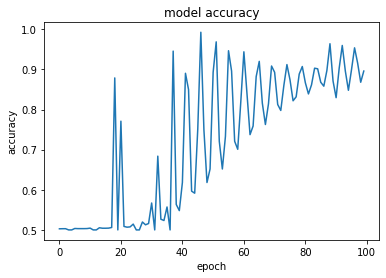

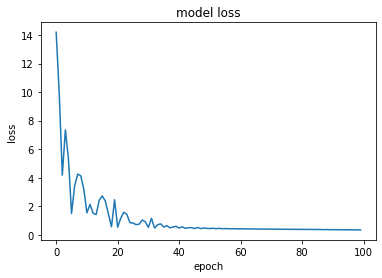

In [71]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=200

In [74]:
number_of_epochs = 60
layer_size = 1000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


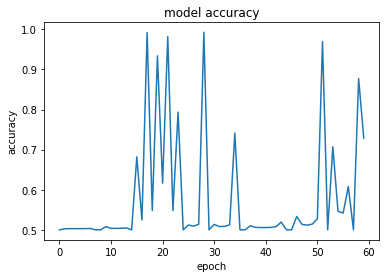

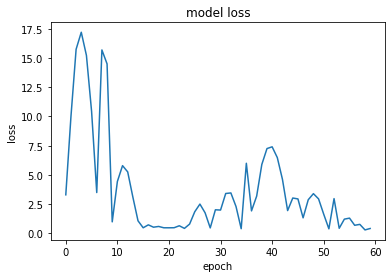

In [75]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1000

In [78]:
class BloomFilter:
    
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        
    def add(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            self.bit_array[result] = 1
            
    def lookup(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            if self.bit_array[result] == 0:
                return False
        return True

#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j]);
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr(bf,nums,r):
    for i in range(int(len(nums)*r)):
        if(bf.lookup(nums[i])==False):
            print(nums[i])
            return -1
    count = 0
    for i in range(int(len(nums)*r),len(nums)):
        if(bf.lookup(nums[i])==True):
            count+=1
    return count/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,k,n,r):
    bf=BloomFilter(m,k)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    k=eff_k(m,n,r)
    find_fpr(m,k,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [87]:
def load_bloom(model,data_x,data_y,bf,n):
    y_pred = model.predict(data_x)
    for i in range(0,n):
        if((y_pred[i]<=0.5)and(data_y[i]==1)):
            print(f'{data_x[i]} inserted to bf')
            bf.add(data_x[i])

In [88]:
#m=75000
#n=25000
#r=0.5
k=eff_k(m,n,r)
bf=BloomFilter(m,k)

In [89]:
load_bloom(model,x_train,y_train,bf,n)

[0] inserted to bf
[0] inserted to bf
[0] inserted to bf
[0] inserted to bf
[0] inserted to bf
[0] inserted to bf
[0] inserted to bf
[0] inserted to bf
[0] inserted to bf


In [105]:
def lookup_model(model,data,bf):
    if(model.predict(data)<=0.99):
        if(bf.lookup(data)==False):
            return False
    return True

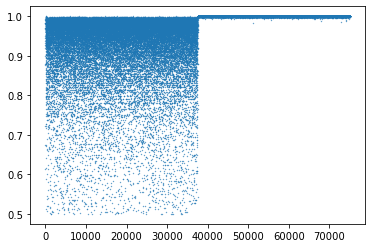

In [106]:
preds = model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=0.1)

In [107]:
print(lookup_model(model,x_train[-1],bf))

True


In [110]:
def calculate_fpr(model,bf,x_train,y_train):
    np=0
    y_pred = model.predict(x_train)
    for i in range(len(x_train)):
        if((y_pred[i]>0.99 or bf.lookup(x_train[i])) and y_train[i]==0):
            np+=1
            continue
        if((y_pred[i]<=0.99 and bf.lookup(x_train[i])==False) and y_train[i]==1):
            print(i)
            return -1
    neg=len(y_train)-K.sum(y_train)
    return float(np/neg)

In [111]:
print(calculate_fpr(model,bf,x_train,y_train))

0
-1
